# Solving the Data Center Cooling problem
## Q Learning
![](https://s-media-cache-ak0.pinimg.com/originals/36/d1/87/36d18741bdd4d2ac0033c53bcc669148.jpg)

##### Summary
1. Theory behind Q-Learning
2. Implementation

##### Libraries

In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
sys.path.append("c:/git/reinforcement-learning/")


# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Seaborn config
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

# Deep Learning (Keras, Tensorflow)
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop, Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D,ZeroPadding2D,Conv2D
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


***
# Theory behind Q Learning
## Introduction

## Markov Decision Processes (MDP)
##### Description
// TBD
##### Q, the action-value function
// TBD

## Bellmann equation
// Refaire l'équation pour Q

## Q-Learning
https://en.wikipedia.org/wiki/Q-learning

##### What is Q-Learning ? 
The Q-Learning algorithm is : 
- **Model Free**, that means that we have no prior knowledge of the MDP transitions and rewards, we just execute the policy and learn from experience
- A **control** problem : taking actions in the environment
- **Online planning** : we actually take actions in the world without planning beforehand


##### Equation
Q-Learning is the process of solving the Bellmann Optimality Equation for $q_*(s,a)$ (the optimal action-value function)
$$Q(s,a) = r + \gamma(max(Q(s',a'))$$

Otherwise said, the Q-action-value for a given state (s) and action (a) is the current reward (r) plus the discounted expectation of future rewards if we choose the best action (a') at the next state (s') 


##### Q-Learning Control Algorihtm

$$Q(s,a) \leftarrow Q(s,a) + \alpha (r + \gamma maxQ(s',a') - Q(s,a))$$

Or as a running average, 
$$Q(s,a) \leftarrow (1-\alpha)Q(s,a) + \alpha (r + \gamma maxQ(s',a'))$$


##### Properties
The above equation converges to optimal policy ! <br>
However : 
 - You have to explore enough
 - The learning rate must be slow enough (it is then very slow)

***
# Environment

In [4]:
from rl.env.data_center_cooling import DataCenterCooling

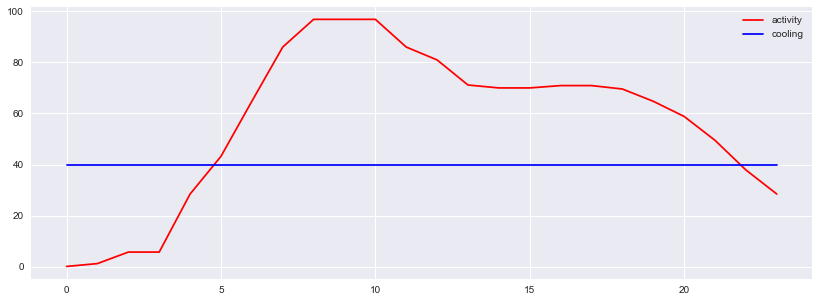

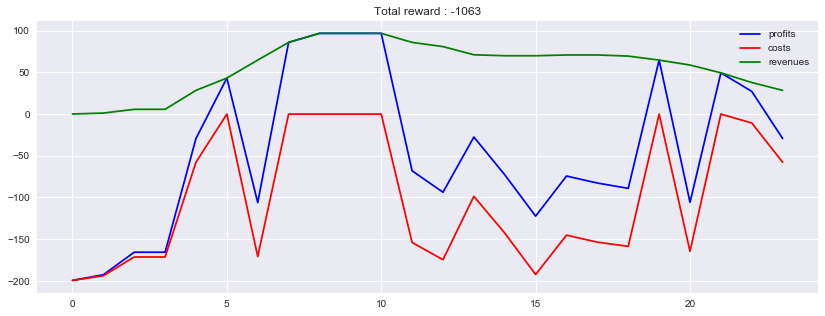

In [5]:
env = DataCenterCooling(levels_cooling=10)
env.render()

***
# Implementation

In [10]:
import sys
sys.path.append("C:/git/reinforcement-learning/")

from rl.agents.q_agent import QAgent
from rl import utils

In [6]:
states_size = len(env.observation_space)
actions_size = len(env.action_space)

agent = QAgent(states_size,actions_size)

In [7]:
agent.Q

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

In [15]:
def run_episode(env,agent,max_step = 100,verbose = 1):
    s = env.reset()
    
    episode_reward = 0
    
    i = 0
    while i < max_step:
        
        # Choose an action
        a = agent.act(s)
        
        # Take the action, and get the reward from environment
        s_next,r,done = env.step(a)
        
        if verbose: print(s_next,r,done)
        
        # Update our knowledge in the Q-table
        agent.train(s,a,r,s_next)
        
        # Update the caches
        episode_reward += r
        s = s_next
        
        # If the episode is terminated
        i += 1
        if done:
            break
            
    return env,agent,episode_reward

In [18]:
def run_n_episodes(env,n_episodes = 2000,lr = 0.8,gamma = 0.95):
    
    # Initialize the agent
    states_size = len(env.observation_space)
    actions_size = len(env.action_space)

    agent = QAgent(states_size,actions_size,lr = lr,gamma = gamma)
    
    # Store the rewards
    rewards = []
    
    # Experience replay
    for i in tqdm(range(n_episodes)):
        
        # Run the episode
        env_temp,agent,episode_reward = run_episode(env,agent,verbose = 0)
        rewards.append(episode_reward)
        
    
    # Plot rewards
    utils.plot_average_running_rewards(rewards)
        
    return agent,rewards
        

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 609.76it/s]


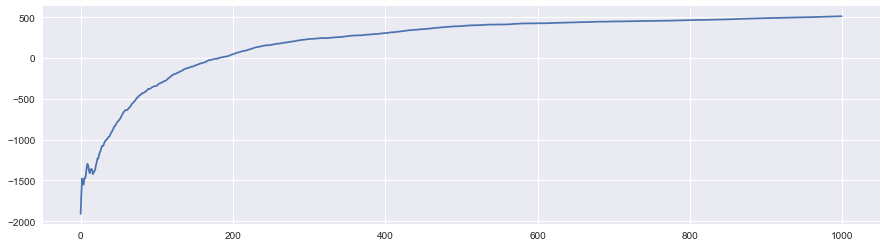

In [33]:
agent,rewards = run_n_episodes(env,n_episodes=1000,lr = 0.1,gamma=0.9)

In [41]:
from plotly.offline import iplot,init_notebook_mode
init_notebook_mode(connected = True)

In [58]:
fig = env.render_states_plotly()

In [59]:
iplot(fig)

In [40]:
env.render_states_plotly()

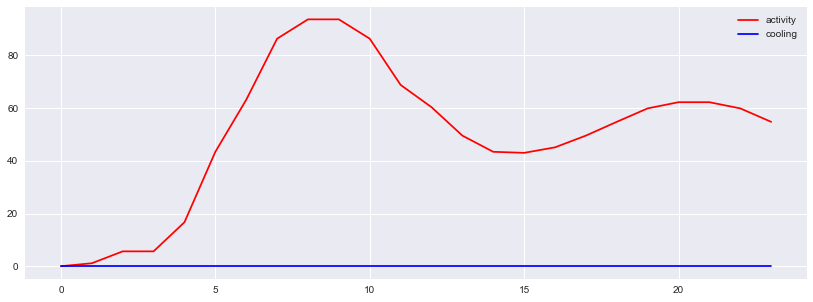

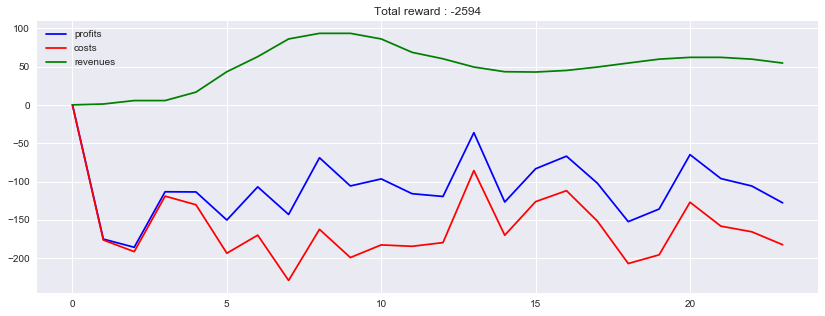

In [34]:
env.reset()
env.render()

In [35]:
env.cooling

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [37]:
env,agent_temp,r = run_episode(env,agent,verbose = True)

1 -48.5622377519 False
2 -33.3201303249 False
3 -30.9641102238 False
5 1.99669621655 False
12 40.704499343 False
17 65.206069495 False
19 84.9876633783 False
19 100.058121151 False
18 100.058121151 False
17 92.5276457404 False
15 84.9876633783 False
10 61.2942186758 False
8 61.6107362795 False
9 46.7859593556 False
11 56.9149290717 False
13 63.253641051 False
15 -129.50167573 False
14 61.2942186758 False
11 55.6822703689 False
7 63.253641051 False
6 57.1372164828 False
5 -108.618717785 False
4 40.704499343 False
0 19.0689544864 True


In [38]:
env.cooling

array([[10, 10, 20, 30, 40, 60, 80, 90, 90, 90, 80, 70, 60, 60, 60, 60, 60,
        70, 70, 60, 40, 40, 40, 40]])

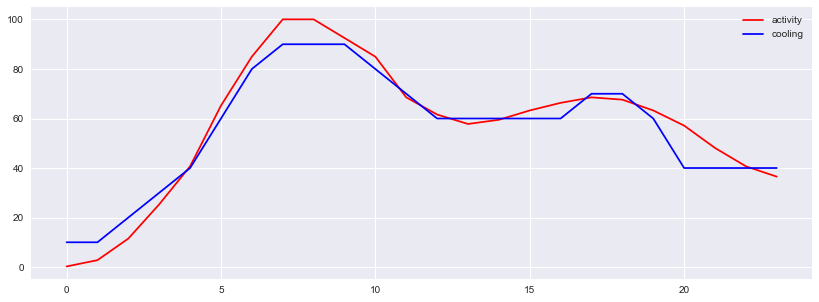

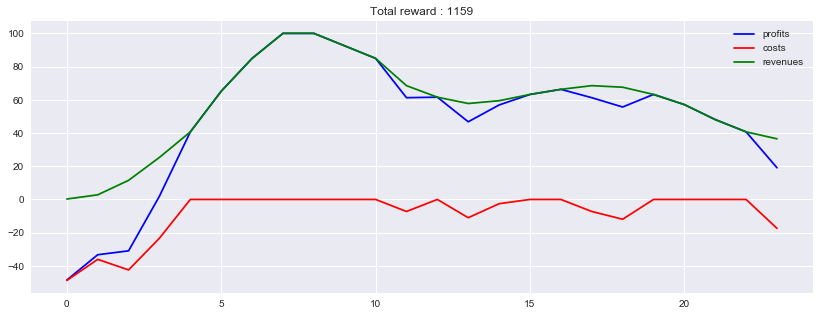

In [39]:
env.render()